Use Autoencoder to implement anomaly detection. Build the model by using: a. Import required libraries b. Upload / access the dataset c. Encoder converts it into latent representation d. Decoder networks convert it back to the original input e. Compile the models with Optimizer, Loss, and Evaluation Metrics

Dataset Shape: (2655, 141)
   -0.11252183  -2.8272038  -3.7738969  -4.3497511  -4.376041  -3.4749863  \
0    -1.100878   -3.996840   -4.285843   -4.506579  -4.022377   -3.234368   
1    -0.567088   -2.593450   -3.874230   -4.584095  -4.187449   -3.151462   
2     0.490473   -1.914407   -3.616364   -4.318823  -4.268016   -3.881110   
3     0.800232   -0.874252   -2.384761   -3.973292  -4.338224   -3.802422   
4    -1.507674   -3.574550   -4.478011   -4.408275  -3.321242   -2.105171   

   -2.1814082  -1.8182865  -1.2505219  -0.47749208  ...  0.79216787  \
0   -1.566126   -0.992258   -0.754680     0.042321  ...    0.538356   
1   -1.742940   -1.490659   -1.183580    -0.394229  ...    0.886073   
2   -2.993280   -1.671131   -1.333884    -0.965629  ...    0.350816   
3   -2.534510   -1.783423   -1.594450    -0.753199  ...    1.148884   
4   -1.481048   -1.301362   -0.498240    -0.286928  ...    1.089068   

   0.93354122  0.79695779  0.57862066  0.2577399  0.22807718  0.12343082  \
0    0.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 141)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 141)            │         4,653 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,813 (42.24 KB)

 Trainable params: 10,813 (42.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 2.5843 - mse: 2.5843 - val_loss: 3.0714 - val_mse: 3.0714
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5164 - mse: 2.5164 - val_loss: 3.0648 - val_mse: 3.0648
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4697 - mse: 2.4697 - val_loss: 3.0577 - val_mse: 3.0577
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4970 - mse: 2.4970 - val_loss: 3.0504 - val_mse: 3.0504
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.4752 - mse: 2.4752 - val_loss: 3.0426 - val_mse: 3.0426
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.6204 - mse: 2.6204 - val_loss: 3.0338 - val_mse: 3.0338
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.4267 - mse: 2.4267 - val_loss: 3.0237 - val_mse: 3.0237
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.4046 - mse: 2.4046 - val_loss: 3.0126 - val_mse: 3.0126
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.4368 - mse: 2.4368 - 

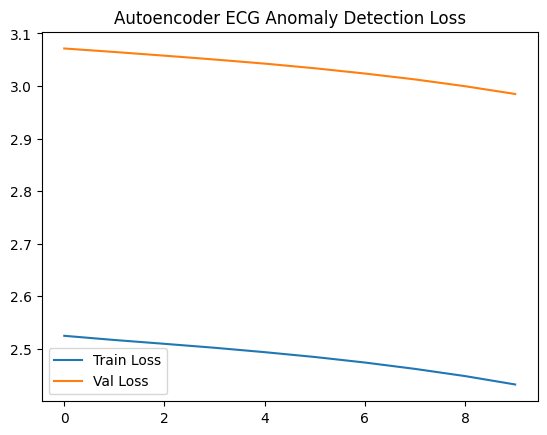

In [ ]:
# ============================================================
# a. IMPORT REQUIRED LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt


# ============================================================
# b. LOAD THE ECG DATASET
# ============================================================
df = pd.read_csv("ecg_autoencoder_dataset.csv")

print("Dataset Shape:", df.shape)
print(df.head())





# ============================================================
# c. PREPROCESSING
# ============================================================

# Replace NaN, inf (safety)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# ✅ ADJUST LABEL COLUMN NAME IF NEEDED
# I assume label column = 'Class'
# last column = label
y = df.iloc[:, -1].values

# all columns except last = features
X = df.iloc[:, :-1].values


# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(df)
X = np.nan_to_num(X)


# ============================================================
# d. BUILD AUTOENCODER
# ============================================================


#Encoder (compresses input → latent):

# Input(shape=(input_dim,)) — accepts flattened credit card features (e.g., 30 dimensions).
# Dense(32, relu) — compresses to 32 neurons; learns general patterns.
# Dense(16, relu) — further compresses to 16 neurons; extracts core features.
# latent = Dense(encoding_dim, relu) — final bottleneck layer (e.g., 16 → 16 or smaller); this is the compressed representation that captures "essence" of normal transactions.
# Decoder (reconstructs latent → output):

# Dense(16, relu) — expands from latent back to 16 neurons.
# Dense(32, relu) — further expands to 32 neurons.
# output_layer = Dense(input_dim, activation='linear') — reconstructs original feature dimension; linear activation (no ReLU) because output must match input range (can be negative or unbounded).

input_dim = X.shape[1]
encoding_dim = 16

input_layer = Input(shape=(input_dim,))
x = Dense(32, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
latent = Dense(encoding_dim, activation='relu')(x)

x = Dense(16, activation='relu')(latent)
x = Dense(32, activation='relu')(x)
output_layer = Dense(input_dim, activation='linear')(x)

autoencoder = Model(input_layer, output_layer)
autoencoder.summary()


# ============================================================
# e. COMPILE AUTOENCODER
# ============================================================
autoencoder.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="mse",
    metrics=["mse"]
)


# ============================================================
# f. TRAIN ONLY ON NORMAL (NON-ANOMALY) ECG SIGNALS
# ============================================================
X_normal = X[y == 0]   # assumes 0 = normal

history = autoencoder.fit(
    X_normal, X_normal,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# ============================================================
# g. RECONSTRUCTION + ANOMALY DETECTION
# ============================================================
reconstruct = autoencoder.predict(X)  # model predicts reconstruction for ALL samples
reconstruct = np.nan_to_num(reconstruct)

loss = np.mean((X - reconstruct)**2, axis=1)

threshold = np.mean(loss) + 3*np.std(loss)
print("\nReconstruction Threshold:", threshold)

y_pred = (loss > threshold).astype(int)


# ============================================================
# h. PERFORMANCE
# ============================================================
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y, y_pred))

print("ROC-AUC Score:", roc_auc_score(y, loss))


# ============================================================
# i. PLOT LOSS
# ============================================================
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Autoencoder ECG Anomaly Detection Loss")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("\n=== ACCURACY METRICS ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print("\n=== CONFUSION MATRIX ===")
print(cm)
print(f"True Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

Use Autoencoder to implement anomaly detection. Build the model by using: a. Import required libraries b. Upload / access the dataset c. Encoder converts it into latent representation d. Decoder networks convert it back to the original input e. Compile the models with Optimizer, Loss, and Evaluation Metrics

✅ 1) Autoencoder Theory (10 Lines, Technical & Exam Perfect)

An autoencoder is an unsupervised neural network trained to reconstruct its input.

It has an encoder that compresses high-dimensional data into a low-dimensional latent representation.

The decoder reconstructs the original input from the latent space.

When trained only on normal data, the autoencoder learns the normal patterns.

During testing, anomalous data produces high reconstruction error because it does not match learned patterns.

The error (usually MSE) is used to determine if a sample is normal or abnormal.

A threshold (mean + 3×std) helps classify anomaly vs non-anomaly.

Autoencoders work well for ECG signals because anomalies are rare and deviate from normal heart rhythm.

Dense layers allow learning compressed ECG feature representations.

Adam optimizer + MSE loss are commonly used because reconstruction is a regression task.

✅ 2) Step-by-Step Explanation of Your Code (Super Clear)
✅ a. Import Libraries

Loads Pandas, NumPy, TensorFlow, Keras, sklearn, and plotting.
These are needed for ML pipeline + training + evaluation.

✅ b. Load ECG Dataset
df = pd.read_csv("ecg_autoencoder_dataset.csv")


Loads ECG samples with a label column:

0 = normal

1 = anomaly

✅ c. Preprocessing

Clean NaN, inf values

Split features and labels

Standard scaling using StandardScaler

ECG signals must be normalized for stable training

Replace any remaining NaN values with 0

Important: Scaling ECG signals ensures equal feature contribution.

✅ d. Build Autoencoder

Architecture:

Encoder:
Dense(32 → 16 → encoding_dim)


Compresses ECG signals into a 16-dimensional latent vector.

Decoder:
Dense(16 → 32 → input_dim)


Reconstructs original ECG features.

Activation:

ReLU inside encoder/decoder

Linear at output (regression)

✅ e. Compile Autoencoder
autoencoder.compile(optimizer=Adam(1e-4), loss="mse")


MSE used because reconstruction is numeric

Adam with small LR avoids exploding loss

✅ f. Train ONLY on Normal ECG signals
X_normal = X[y == 0]
autoencoder.fit(X_normal, X_normal)


Very important idea:

✅ Train on normal
❌ Don’t train on anomaly

This teaches the autoencoder to reconstruct only normal patterns.

✅ g. Reconstruction + Anomaly Detection

Predict reconstruction:

reconstruct = autoencoder.predict(X)


Compute reconstruction error (per sample):

loss = mean squared error


Set anomaly threshold:

threshold = mean + 3*std


Predict anomaly if:

loss > threshold

✅ h. Evaluate System

Uses:

classification_report (precision, recall, f1-score)

ROC-AUC (quality of anomaly detection score)

Higher ROC-AUC → better anomaly detection.

✅ i. Plot Training Loss

Shows if model converged and if validation line is stable.

✅ 3) Important Terms (Exam Must-Know)
Term	Meaning
Autoencoder	NN that reconstructs input
Encoder	Compresses data into latent vector
Latent Space	Lower-dimensional hidden representation
Decoder	Rebuilds the original input
Reconstruction Error	Difference between input and output
Threshold	Cutoff for anomaly detection
Normal Data	Used for training
Anomalous Data	Detected using error spike
MSE Loss	Measures reconstruction accuracy
Adam Optimizer	Adaptive learning for stable convergence